In [2]:
import xml.etree.ElementTree as ET
import pandas as pd

In [3]:
# Load the XML file
tree = ET.parse('data_folder_xDD/drugbank_copy_pasted.xml')
root = tree.getroot()

In [105]:
# Define a list to hold the data
data = []

# Use the namespace to access elements
ns = {'ns': 'http://www.drugbank.ca'}

for drug in root:

    row = {
        'id': drug.find('ns:drugbank-id', ns).text,
        'name': drug.find('ns:name', ns).text,
        'description': drug.find('ns:description', ns).text,
        'state': drug.find('ns:state', ns).text,
        'indication': drug.find('ns:indication', ns).text, # wskazania = indications
        'mechanism-of-action': drug.find('ns:mechanism-of-action', ns).text, # mechanizm działania leku = mechanism of action of the drug
        'food-interactions': [
            interaction.text.strip()
            for interaction in drug.find('ns:food-interactions', ns).iter()
            if interaction.text and interaction.text.strip()    # iterate over non-empty interactions in order to remove unnecessary "\n "
        ] if (len(drug.find('ns:food-interactions', ns)) > 0) else None # if there are no food interactions we simply return "None" instead of "[]"
    }
    data.append(row)

In [106]:
df = pd.DataFrame(data)

df # (1) done

,id,name,description,state,indication,mechanism-of-action,food-interactions
0,DB00001,Lepirudin,Lepirudin is a recombinant hirudin formed by 6...,solid,Lepirudin is indicated for anticoagulation in ...,Lepirudin is a direct thrombin inhibitor used ...,[Avoid herbs and supplements with anticoagulan...
1,DB00002,Cetuximab,Cetuximab is a recombinant chimeric human/mous...,liquid,Cetuximab indicated for the treatment of local...,The epidermal growth factor receptor (EGFR) is...,None
2,DB00003,Dornase alfa,Dornase alfa is a biosynthetic form of human d...,liquid,Used as adjunct therapy in the treatment of cy...,Dornase alfa is a biosynthetic form of human D...,None
3,DB00004,Denileukin diftitox,A recombinant DNA-derived cytotoxic protein co...,liquid,For treatment of cutaneous T-cell lymphoma,Denileukin diftitox binds to the high-affinity...,None
4,DB00005,Etanercept,Dimeric fusion protein consisting of the extra...,liquid,Etanercept is indicated for the treatment of m...,There are two distinct receptors for TNF (TNFR...,None
...,...,...,...,...,...,...,...
95,DB00104,Octreotide,Acromegaly is a disorder caused by excess grow...,solid,Octreotide by injection is used for the treatm...,Octreotide binds to somatostatin receptors cou...,[Take on an empty stomach. The oral capsules s...
96,DB00105,Interferon alfa-2b,Interferon alpha 2b (human leukocyte clone hif...,liquid,"For the treatment of hairy cell leukemia, mali...",Interferon alpha binds to type I interferon re...,[Avoid alcohol.]
97,DB00106,Abarelix,Synthetic decapeptide antagonist to gonadotrop...,solid,For palliative treatment of advanced prostate ...,Abarelix binds to the gonadotropin releasing h...,None
98,DB00107,Oxytocin,Sir Henry H. Dale first identified oxytocin an...,liquid,Administration of exogenous oxytocin is indica...,Oxytocin plays a vital role in labour and deli...,None


In [107]:
synonyms = []

# Use the namespace to access elements
ns = {'ns': 'http://www.drugbank.ca'}

for drug in root:

    row = {
        'id': drug.find('ns:drugbank-id', ns).text,
        'name': drug.find('ns:name', ns).text, # this might be redundant
        'synonyms': [
            synonym.text.strip() # aby nie trzymać zbendnych "\n "
            for synonym in drug.find('ns:synonyms', ns).iter() # iterujemy po interakcjach
            if synonym.text and synonym.text.strip()    # iterujemy tylko po nie-pustych
        ]
    }
    synonyms.append(row)

synonyms = pd.DataFrame(synonyms)
synonyms = synonyms.set_index('id')
synonyms

,name,synonyms
id,,
DB00001,Lepirudin,"[[Leu1, Thr2]-63-desulfohirudin, Desulfatohiru..."
DB00002,Cetuximab,"[Cetuximab, Cétuximab, Cetuximabum]"
DB00003,Dornase alfa,[Deoxyribonuclease (human clone 18-1 protein m...
DB00004,Denileukin diftitox,"[Denileukin, Denileukin diftitox, Interleukin-..."
DB00005,Etanercept,"[Etanercept, etanercept-szzs, etanercept-ykro,..."
...,...,...
DB00104,Octreotide,"[Octreotida, Octreotide, Octreotidum, Octrotide]"
DB00105,Interferon alfa-2b,"[Interferon alfa-2b, Interferon alfa-2b (recom..."
DB00106,Abarelix,[Abarelix]


In [108]:
import networkx as nx
import matplotlib.pyplot as plt

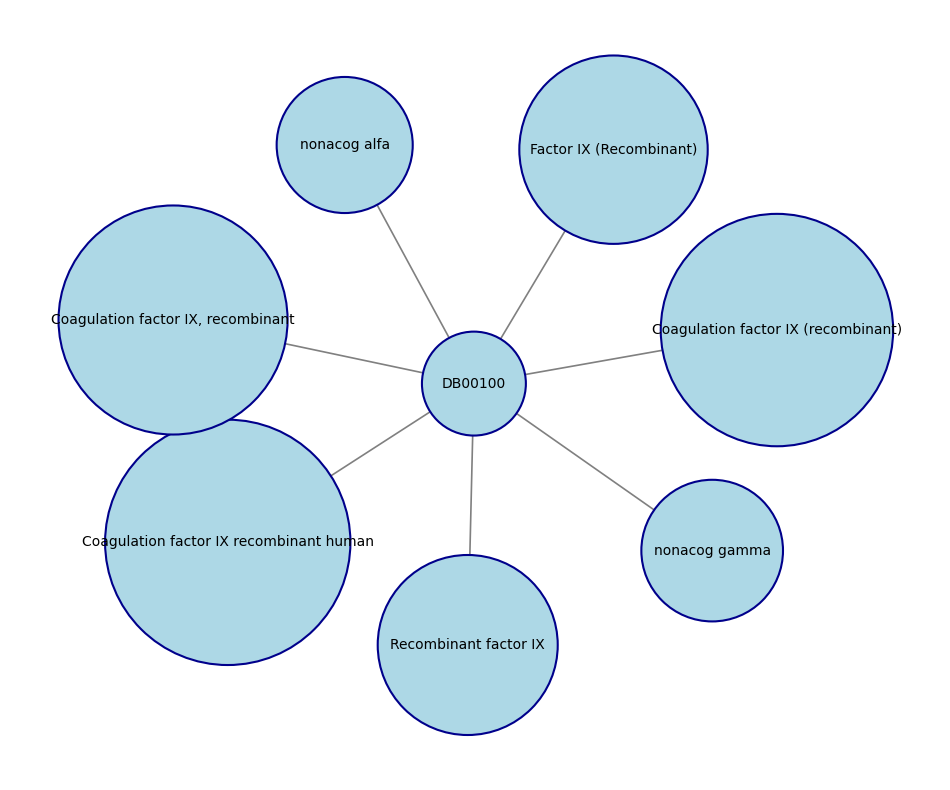

In [113]:
def draw_synonyms(drug_bank_id):
    syns = synonyms.loc[drug_bank_id, 'synonyms']
    edge_list = [(drug_bank_id, syn) for syn in syns]
    G = nx.from_edgelist(edge_list)

    pos = nx.spring_layout(G, k=1, seed=42)

    # scaling each node based on their label length
    labels = {node: node for node in G.nodes()}
    node_sizes = [len(label) * 800 for label in labels.values()]

    # drawing the graph
    plt.figure(figsize=(12, 10))  # Larger area for better readability
    nx.draw_networkx_edges(G, pos, edge_color="gray", width=1.2)
    nx.draw_networkx_nodes(
        G,
        pos,
        node_size=node_sizes,
        node_color="lightblue",
        linewidths=1.5,
        edgecolors="darkblue",
    )
    nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color="black")

    # show the graph
    plt.axis("off")
    plt.margins(0.2)
    plt.show()



draw_synonyms('DB00100') # (2) done

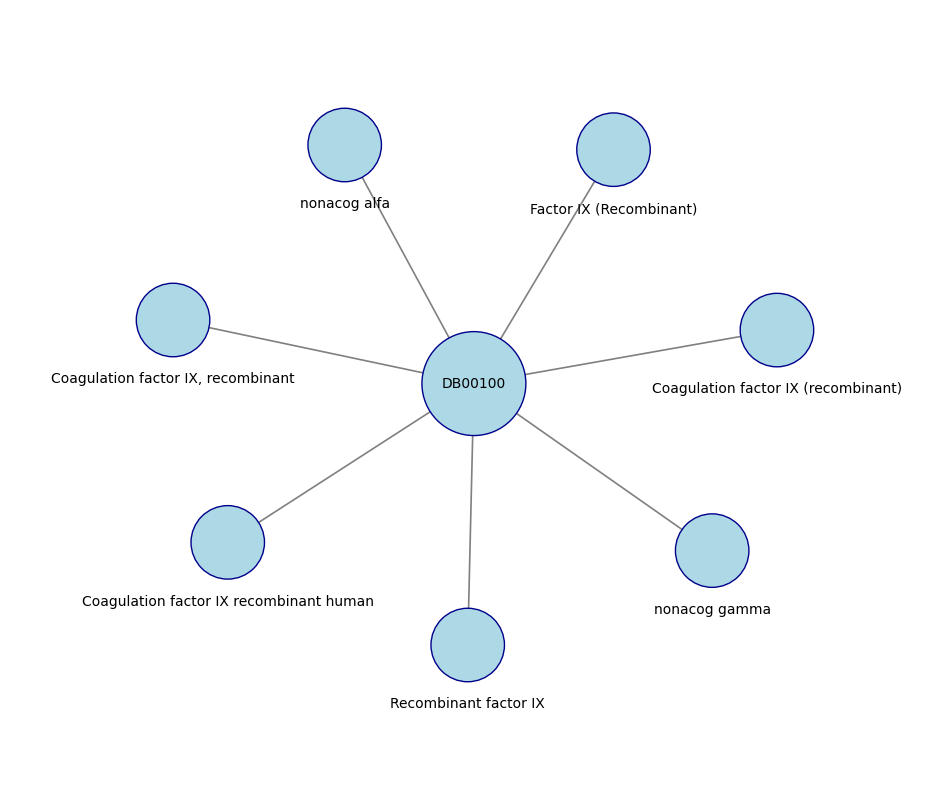

In [114]:
def draw_synonyms(drug_bank_id):
    syns = synonyms.loc[drug_bank_id, 'synonyms']
    edge_list = [(drug_bank_id, syn) for syn in syns]
    G = nx.from_edgelist(edge_list)

    pos = nx.spring_layout(G, k=1, seed=42)

    # node sizes
    central_size = len(drug_bank_id) * 800
    node_sizes = [central_size if node == drug_bank_id else central_size/2 for node in G]

    # drawing nodes and edges
    plt.figure(figsize=(12, 10))  # Larger area for better readability
    nx.draw_networkx_edges(G, pos, edge_color="gray", width=1.2)
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="lightblue", edgecolors="darkblue")

    # labeling the central node (in the middle of the node):
    nx.draw_networkx_labels(
        G,
        {drug_bank_id: pos[drug_bank_id]},  # Only the central node
        {drug_bank_id: drug_bank_id},
        font_size=10,
        verticalalignment="center"
    )

    # labeling other nodes (under the nodes):

    # first we shift the positon of other nodes down by 0.2 of an inch
    shifted_pos = {node: (x, y-0.2) for node, (x, y) in pos.items() if node != drug_bank_id}
    nx.draw_networkx_labels(
        G,
        shifted_pos,
        labels={node: node for node in shifted_pos},
        font_size=10,
        verticalalignment="top"
    )

    # showing the graph
    plt.axis("off")
    plt.margins(0.2)
    plt.show()

draw_synonyms('DB00100') # (2) done better ?